In [26]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re
import netCDF4 as nc

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.viewer_2d import *
from code_comparison.code_comparison import *

from gridtools.solps_python_scripts.read_b2fgmtry import *

from soledge.mk_funcs import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [29]:
wfluxes, wfluxes_integral = get_soledge_wall_fluxes(
    path_solps = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    path_soledge = os.path.join(onedrive_path, r"Project\collab\tech\compare_data\run_directory"),
    plot = False
)

b2fgmtry loaded from .pkl
b2fgmtry loaded from .pkl
plot1d_wall_fluxes
load_eirene_triangles: reading file  c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\run_directory\triangles.h5
wall_segments
wall_segments: completed
	h5_read: error reading:  /walls_eirene_external/nExtWalls
	h5_read: error reading:  surfaces/nSurfaces
load_eirene_triangles: Completed
get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed
TFluxEe       = 0.6168930615045548
TFluxEi       = 0.6903952429611567
TFluxETot     = 1.5904124434022942
TFluxERadTot  = 0.02211827896714441
TFluxi        = 1.9502165113161627e+22
TfluxD         = 4.064725400006821e+22
TfluxD_2       = 2.1232080600222463e+22
plot1d_wall_fluxes: Completed


In [30]:
soledge = SOLEDGEdata()
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\plot1d_no_curr.csv", mode = "plot1d_omp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\2023-02-21 - IMP profiles\plot1d_hfs_meters.csv", mode = "plot1d_imp")
soledge.read_csv(r"C:\Users\mikek\OneDrive\Project\collab\From\Luca\15-12-2022\To_Mike\wall_ntmpi_no_curr.csv", mode = "wall_ntmpi")

In [34]:
target

,Ne,Te,Jsat_e,Me,Nd+,Td+,Jsat_d+,"Md+,",Ioniz_H,Pe,Pd+
pos,,,,,,,,,,,
-1.924500,1.000000e+15,0.010148,2.590400e-13,-0.000002,1.000000e+15,0.011274,2.590400e-13,-0.000002,0.1,0.000002,0.000002
-1.858554,1.000000e+15,0.010148,3.123300e-10,0.001917,1.000000e+15,0.011279,3.123400e-10,0.001917,0.1,0.000002,0.000002
-1.793860,1.000000e+15,0.010148,1.382000e-08,0.084820,1.000000e+15,0.011288,1.382000e-08,0.084821,0.1,0.000002,0.000002
-1.731510,1.000000e+15,0.010148,1.382000e-08,0.084820,1.000000e+15,0.011288,1.382000e-08,0.084821,0.1,0.000002,0.000002
-1.674460,1.000000e+15,0.010106,8.590600e-10,0.005332,1.000000e+15,0.010850,8.590700e-10,0.005332,0.1,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...
3.110300,1.000100e+15,0.010122,5.747700e-10,-0.003555,1.000100e+15,0.010975,5.747700e-10,-0.003555,0.1,0.000002,0.000002
3.140900,1.000000e+15,0.010148,1.410800e-08,-0.086585,1.000000e+15,0.011290,1.410800e-08,-0.086586,0.1,0.000002,0.000002
3.202900,1.000000e+15,0.010148,1.410800e-08,-0.086585,1.000000e+15,0.011290,1.410800e-08,-0.086586,0.1,0.000002,0.000002


In [52]:
wfluxes_all

,R,Z,L,dL,pflux_i,hflux_tot,hflux_totrad,hflux_par_tot,hflux_par_e,hflux_par_i,pflux_a,pflux_m,pflux_n
0,0.987017,0.016437,0.000000,0.065946,0.000000e+00,0.017715,0.000501,1.568294,4.410440e-13,0.0,6.063406e+20,1.035343e+20,8.134091e+20
1,0.986665,0.081756,0.064694,0.064694,0.000000e+00,0.021681,0.000506,1.568294,0.000000e+00,0.0,6.178054e+20,1.098191e+20,8.374436e+20
2,0.983368,0.145121,0.127041,0.062346,0.000000e+00,0.020725,0.000514,1.568294,1.247340e-11,0.0,6.100092e+20,1.230305e+20,8.560701e+20
3,0.972790,0.203670,0.184094,0.057054,0.000000e+00,0.023187,0.000526,1.568294,4.846739e-11,0.0,6.140742e+20,1.073107e+20,8.286957e+20
4,0.964451,0.234415,0.190752,0.006658,0.000000e+00,0.024758,0.000540,1.568294,4.789705e-11,0.0,5.713386e+20,9.924861e+19,7.698358e+20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.959833,-0.251438,4.919134,0.028223,0.000000e+00,0.021513,0.000521,1.568294,2.530495e-11,0.0,6.297287e+20,1.161475e+20,8.620237e+20
351,0.967534,-0.223057,4.949724,0.030591,0.000000e+00,0.017166,0.000512,1.568294,4.842809e-11,0.0,5.826222e+20,1.075706e+20,7.977633e+20
352,0.978912,-0.178217,5.011663,0.061938,4.513144e+17,0.018667,0.000502,1.568294,4.556479e-11,0.0,6.001394e+20,1.175806e+20,8.353005e+20
353,0.986506,-0.115438,5.077064,0.065401,0.000000e+00,0.018037,0.000495,1.568294,0.000000e+00,0.0,5.880404e+20,1.137542e+20,8.155489e+20


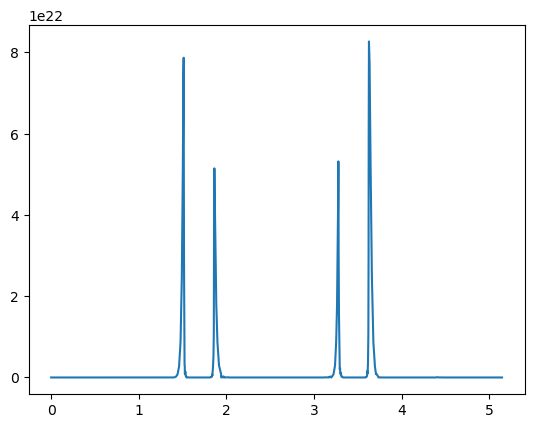

In [53]:
wfluxes_all = pd.concat([x for x in wfluxes.values()]).sort_index()
# wfluxes_all["pflux_i"].plot(x="pos")
plt

<Axes: xlabel='pos'>

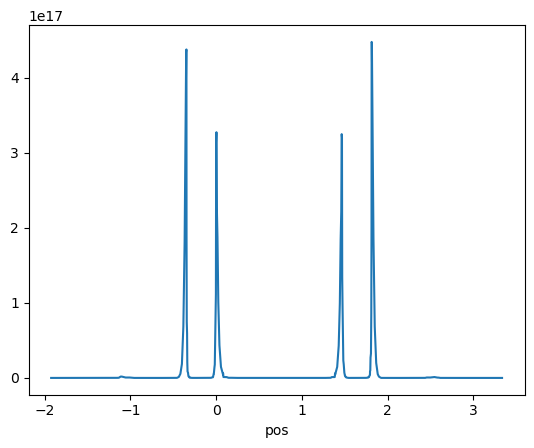

In [88]:
(target["Jsat_d+"] / constants("q_e")).plot()

<Axes: xlabel='pos'>

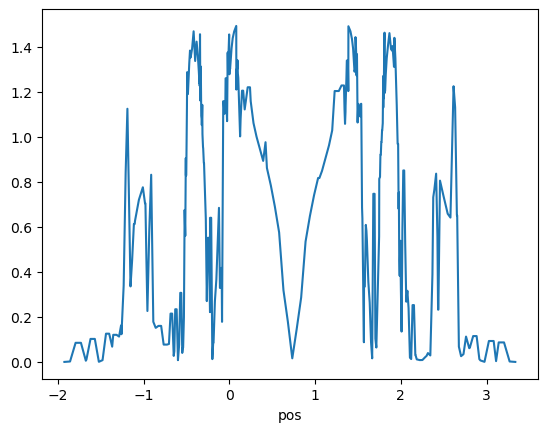

In [82]:
target["Md+"].abs().plot()

In [68]:
%matplotlib widget

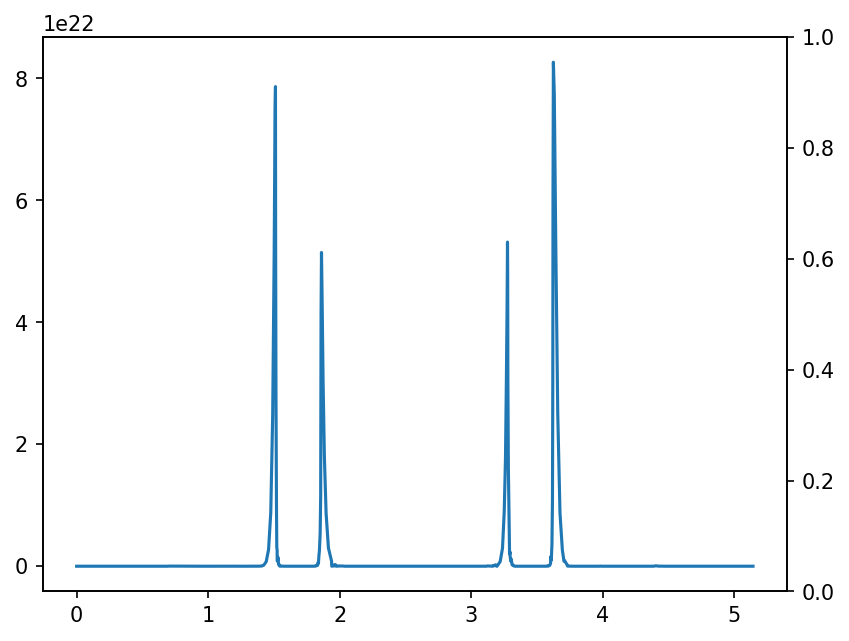

In [79]:
fig, ax = plt.subplots(dpi = 150)
ax2 = ax.twinx()
ax.plot(wfluxes_all.L, wfluxes_all["pflux_i"], label = "Wall fluxes")
# ax2.plot(target.index+1.84, target["NVd+"], label = "Wall fluxes", ls = "--", c = "darkorange")

In [77]:
plt.close("all")
%matplotlib inline

<Axes: xlabel='pos'>

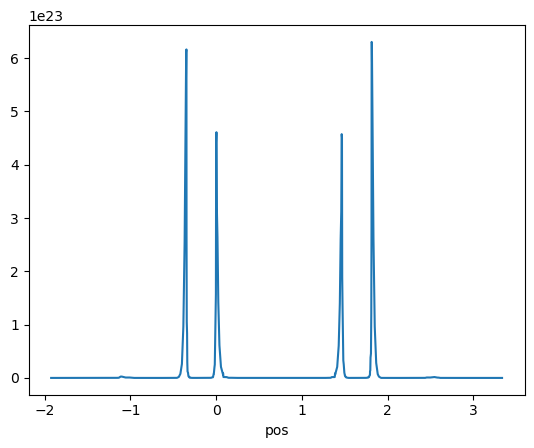

In [94]:
target = soledge.regions["outer_lower"].rename({"Md+,":"Md+"}, axis = 1)

target["cs"] = np.sqrt( (constants("q_e") * (target["Te"]+target["Td+"])) / (constants("mass_p")*1) ) # This is a hydrogen case
# target[""]
target["Vd+"] = (target["Md+"].abs() * target["cs"])

target["NVd+"] = target["Vd+"] * target["Ne"] 
target["NVd+"].plot()
# target["Te"].plot()